# Scotch Discovery Project

## Motivation
In 2019, my family and I went on a multi-day scotch tasting tour on the Scottish isle of Islay. Here we toured three to four distilleries each day, all of which let us taste four to six different whiskeys. This experience helped me refine my taste in scotches, but I still do not have much experience with scotches from regions other than Islay. I would like to branch out, but I would also like to do so in a way where I do not have to buy and drink an unreasonable amount of whiskey to find products I enjoy.

Then while reading "Data Science for Business" by Foster Provost and Tom Fawcett, I came across an example of one of the authors using a whiskey dataset to figure out what types of scotch he might like and I thought, "*Wait, I could do something like that.*"

## Section 1: Data

Following in the footsteps of Provost and Fawcett I used the "Scotch Whiskey" dataset created by Francois-Joseph Lapointe and Pierre Legendre, via [Numerical Ecology](http://www.numericalecology.com/data/scotch.html). Here I was able to get access to the data as well as Lapointe and Legendre's original research paper which provided the methodology they used to perform analysis on their dataset, but not their code. My goal for this project is to use Hierarchical Clustering to find scotches with similar characteristics to those I like, and better inform myself on what types of scotch I might prefer.

### Data Summary and Limitations
The dataset contains information on a whiskey's color, nose, palate, finish, age, alcohol content, and the location of its distillery, plus more subjective scores for the quality of the product and its distillery.

Something to note is that this dataset contains data only on each distillery's most "standard" single malt whiskey, where most distilleries have multiple products with different ages, finishes, etc. Also, this data was collected in the early 1990s, so there is a potential for some of the products' flavors to have evolved over the course of that much time. Additionally, some of the distilleries in this dataset have closed and new ones have opened since then and thus are not included.

In [46]:
# Clear workspace and set working directory
rm(list=ls())
setwd("C:\\Users\\flops\\Documents\\R\\")

In [36]:
# install necessary packages
install.packages("tidyverse")
install.packages("readxl") # Since the data is a .xlsx file, install and load the relevant package
install.packages("janitor")
install.packages("tidyr")
install.packages("purrr")
install.packages("cluster")
install.packages("ggdendro")
install.packages("factoextra")
install.packages('dendextend')
install.packages("circlize")

also installing the dependencies 'lattice', 'colorspace', 'sys', 'bit', 'ps', 'sass', 'cachem', 'memoise', 'nlme', 'Matrix', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'rappdirs', 'askpass', 'bit64', 'processx', 'highr', 'yaml', 'xfun', 'bslib', 'jquerylib', 'tinytex', 'backports', 'assertthat', 'blob', 'DBI', 'data.table', 'gtable', 'isoband', 'MASS', 'mgcv', 'scales', 'gargle', 'curl', 'ids', 'rematch2', 'mime', 'openssl', 'clipr', 'vroom', 'tzdb', 'callr', 'fs', 'knitr', 'rmarkdown', 'selectr', 'broom', 'dbplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'haven', 'httr', 'modelr', 'readr', 'reprex', 'rstudioapi', 'rvest', 'xml2'





  There are binary versions available but the source versions are later:
      binary  source needs_compilation
nlme 3.1-161 3.1-162              TRUE
fs     1.5.2   1.6.0              TRUE

  Binaries will be installed
package 'lattice' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'sys' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked and MD5 sums checked
package 'ps' successfully unpacked and MD5 sums checked
package 'sass' successfully unpacked and MD5 sums checked
package 'cachem' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
pack

Warning message:
"package 'readxl' is in use and will not be installed"
Warning message:
"package 'janitor' is in use and will not be installed"
Warning message:
"package 'tidyr' is in use and will not be installed"
Warning message:
"package 'purrr' is in use and will not be installed"


In [229]:
# Import the data
library("readxl")
scotch <- read_excel("scotch.xlsx") 

New names:
* `` -> `...1`
* `` -> `...2`
* `color` -> `color...3`
* `color` -> `color...4`
* `color` -> `color...5`
* `color` -> `color...6`
* `color` -> `color...7`
* `color` -> `color...8`
* `color` -> `color...9`
* `color` -> `color...10`
* `color` -> `color...11`
* `color` -> `color...12`
* `color` -> `color...13`
* `color` -> `color...14`
* `color` -> `color...15`
* `color` -> `color...16`
* `NOSE` -> `NOSE...17`
* `NOSE` -> `NOSE...18`
* `NOSE` -> `NOSE...19`
* `NOSE` -> `NOSE...20`
* `NOSE` -> `NOSE...21`
* `NOSE` -> `NOSE...22`
* `NOSE` -> `NOSE...23`
* `NOSE` -> `NOSE...24`
* `NOSE` -> `NOSE...25`
* `NOSE` -> `NOSE...26`
* `NOSE` -> `NOSE...27`
* `NOSE` -> `NOSE...28`
* `BODY` -> `BODY...29`
* `BODY` -> `BODY...30`
* `BODY` -> `BODY...31`
* `BODY` -> `BODY...32`
* `BODY` -> `BODY...33`
* `BODY` -> `BODY...34`
* `BODY` -> `BODY...35`
* `BODY` -> `BODY...36`
* `PAL` -> `PAL...37`
* `PAL` -> `PAL...38`
* `PAL` -> `PAL...39`
* `PAL` -> `PAL...40`
* `PAL` -> `PAL...41`
* `PAL` -> `

In [230]:
# show the head of the dataset
head(scotch, n=10)
print('Number of columns: ')
print(ncol(scotch))
print('Number of rows: ')
print(nrow(scotch))

...1,...2,color...3,color...4,color...5,color...6,color...7,color...8,color...9,color...10,...,...76,...77,...78,...79,...80,...81,...82,...83,...84,...85
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NAME,NA,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
Aberfeldy,Aberfeldy,0,1,0,0,0,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
Aberlour,Aberlour,0,0,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
Ardberg,Ardberg,0,0,0,0,0,0,0,0,...,SOUTH,1,0,0,0,0,0,0,0,0
Ardmore,Ardmore,0,0,0,0,1,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
Auchentoshan,Auchentosh,0,0,0,0,1,0,0,0,...,WEST,0,0,0,0,0,0,1,0,0
Aultmore,Aultmore,0,0,1,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
Balblair,Balblair,1,0,0,0,0,0,0,0,...,NORTH,0,0,0,0,0,1,0,0,0
Balmenach,Balmenach,0,0,0,0,1,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0


[1] "Number of columns: "
[1] 85
[1] "Number of rows: "
[1] 112


### Data Cleaning
In its original state, the first row of the data provides a much better description of what is being represented than the column names. I can also see that there are some columns with categorical values such as the district each product is from. While this makes things more readable, I want my data to be numerical. 

To deal with this, I will be replacing the column names with the value of the first row, adding prefixes to the names to distinguish betweeen columns with the same name (for example, a whiskey having a sherry *color* vs. a sherry *finish*) and then removing the categorical columns that would hinder my calculations.

In [231]:
# Removing the NA column
scotch <- scotch[, -2]

# The janitor package has a very simple function to turn a row into the column names
library("janitor")

scotch <- row_to_names(scotch, row_number = 1) # Replace the column names with the first row
head(scotch) # Check to make sure this looks like how I want it to


Warning message in row_to_names(scotch, row_number = 1):
"Row 1 does not provide unique names. Consider running clean_names() after row_to_names()."


NAME,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,bronze,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Aberfeldy,0,1,0,0,0,0,0,0,0,...,MIDLAND,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,...,SOUTH,1,0,0,0,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0
Auchentoshan,0,0,0,0,1,0,0,0,0,...,WEST,0,0,0,0,0,0,1,0,0
Aultmore,0,0,1,0,0,0,0,0,0,...,SPEY,0,0,1,0,0,0,0,0,0


In [232]:
# Now we're going to look at the column names to figure out which ones need to be removed
colnames(scotch, do.NULL = TRUE, prefix = "col")

[1] "NAME"     "wyne"     "yellow"   "v.pale"   "pale"     "p.gold"  
 [7] "gold"     "o.gold"   "f.gold"   "bronze"   "p.amber"  "amber"   
[13] "f.amber"  "red"      "sherry"   "AROMA"    "PEAT"     "SWEET"   
[19] "LIGHT"    "FRESH"    "DRY"      "FRUIT"    "GRASS"    "SEA"     
[25] "SHERRY"   "SPICY"    "RICH"     "soft"     "med"      "full"    
[31] "round"    "smooth"   "light"    "firm"     "oily"     "full"    
[37] "dry"      "sherry"   "big"      "light"    "smooth"   "clean"   
[43] "fruit"    "grass"    "smoke"    "sweet"    "spice"    "oil"     
[49] "salt"     "arome"    "full"     "dry"      "warm"     "big"     
[55] "light"    "smooth"   "clean"    "fruit"    "grass"    "smoke"   
[61] "sweet"    "spice"    "oil"      "salt"     "arome"    "ling"    
[67] "long"     "very"     "quick"    "AGE"      "DIST"     "SCORE"   
[73] "%"        "REGION"   "DISTRICT" "islay"    "midland"  "spey"    
[79] "east"     "west"     "north"    "lowland"  "campbell" "islands"

In [233]:
# Adding the prefixes
# Note: I used the original Excel sheet to determine where the prefixes need to go

colnames(scotch) <- c('NAME', 'color.wyne', 'color.yellow', 'color.v.pale', 'color.pale', 
                    'color.p.gold', 'color.gold', 'color.o.gold', 'color.f.gold', 
                    'color.bronze', 'color.p.amber', 'color.amber', 'color.f.amber', 'color.red', 
                    'color.sherry', 'nose.AROMA', 'nose.PEAT', 'nose.SWEET', 'nose.LIGHT', 'nose.FRESH', 
                    'nose.DRY', 'nose.FRUIT', 'nose.GRASS', 'nose.SEA', 'nose.SHERRY', 'nose.SPICY',
                    'nose.RICH', 'body.soft', 'body.med', 'body.full', 'body.round', 'body.smooth', 
                    'body.light', 'body.firm', 'body.oily', 'pal.full', 'pal.dry', 'pal.sherry', 
                    'pal.big', 'pal.light', 'pal.smooth', 'pal.clean', 'pal.fruit', 'pal.grass', 
                    'pal.smoke', 'pal.sweet', 'pal.spice', 'pal.oil', 'pal.salt', 'pal.arome', 'fin.full',
                    'fin.dry', 'fin.warm', 'fin.big', 'fin.light', 'fin.smooth', 'fin.clean', 'fin.fruit',
                    'fin.grass', 'fin.smoke', 'fin.sweet', 'fin.spice', 'fin.oil', 'fin.salt', 'fin.arome',
                    'fin.ling', 'fin.long', 'fin.very', 'fin.quick', 'AGE', 'DIST', 'SCORE', '%', 'REGION',
                    'DISTRICT', 'dis.islay', 'dis.midland', 'dis.spey', 'dis.east', 'dis.west', 'dis.north',
                    'dis.lowland', 'dis.campbell','dis.islands')



In their research paper, Lapointe and Legendre mention they did not use the distillery score, or scotch score for their clustering, and as such, I will be removing them from my dataset as well. Additionally, they mentioned that they separated out the geographical information-- something I have elected to do at a later stage of data cleansing.

In [234]:
# Removing columns
rm_col <- c( 'AGE', 'DIST', 'SCORE', '%', 'REGION', 'DISTRICT') # The columns I want to remove
scotch <- scotch[, !(colnames(scotch) %in% rm_col), drop = FALSE]

colnames(scotch)

[1] "NAME"          "color.wyne"    "color.yellow"  "color.v.pale" 
 [5] "color.pale"    "color.p.gold"  "color.gold"    "color.o.gold" 
 [9] "color.f.gold"  "color.bronze"  "color.p.amber" "color.amber"  
[13] "color.f.amber" "color.red"     "color.sherry"  "nose.AROMA"   
[17] "nose.PEAT"     "nose.SWEET"    "nose.LIGHT"    "nose.FRESH"   
[21] "nose.DRY"      "nose.FRUIT"    "nose.GRASS"    "nose.SEA"     
[25] "nose.SHERRY"   "nose.SPICY"    "nose.RICH"     "body.soft"    
[29] "body.med"      "body.full"     "body.round"    "body.smooth"  
[33] "body.light"    "body.firm"     "body.oily"     "pal.full"     
[37] "pal.dry"       "pal.sherry"    "pal.big"       "pal.light"    
[41] "pal.smooth"    "pal.clean"     "pal.fruit"     "pal.grass"    
[45] "pal.smoke"     "pal.sweet"     "pal.spice"     "pal.oil"      
[49] "pal.salt"      "pal.arome"     "fin.full"      "fin.dry"      
[53] "fin.warm"      "fin.big"       "fin.light"     "fin.smooth"   
[57] "fin.clean"     "fin.fruit"     "fin.grass"     "fin.smoke"    
[61] "fin.sweet"     "fin.spice"     "fin.oil"       "fin.salt"     
[65] "fin.arome"     "fin.ling"      "fin.long"      "fin.very"     
[69] "fin.quick"     "dis.islay"     "dis.midland"   "dis.spey"     
[73] "dis.east"      "dis.west"      "dis.north"     "dis.lowland"  
[77] "dis.campbell"  "dis.islands"

I am now going to check for NAs, and then convert the datatype of the columns, except the "NAME" column, from character to numeric. The "NAME" column will ultimately be turned into the row name, but I am saving that until later.

In [237]:
# Check for NAs
sum(is.na(scotch))
# We have 79 NAs that need to be dropped

[1] 79

In [238]:
# Loading the "tidyr" package
library("tidyr")
scotch <- scotch %>% drop_na() #Remove NA's using drop_na()

# Check number of NAs again
sum(is.na(scotch)) # Success! No more NAs!

[1] 0

In [239]:
# Check number of columns
print('Number of columns: ')
print(ncol(scotch)) # We have 78 columns

[1] "Number of columns: "
[1] 78


In [240]:
# Convert all of the columns except the distillery names to numeric 
scotch[, 2:78] <- sapply(scotch[, 2:78], as.numeric) 
head(scotch) # looking much better!

NAME,color.wyne,color.yellow,color.v.pale,color.pale,color.p.gold,color.gold,color.o.gold,color.f.gold,color.bronze,...,fin.quick,dis.islay,dis.midland,dis.spey,dis.east,dis.west,dis.north,dis.lowland,dis.campbell,dis.islands
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aberfeldy,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Auchentoshan,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Aultmore,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [241]:
# Load the "tidyverse" package 
library("tidyverse")
scotch <- scotch %>% column_to_rownames(., var = "NAME") # Turn the first column into row names
head(scotch) # Check to make sure this is showing up right

,color.wyne,color.yellow,color.v.pale,color.pale,color.p.gold,color.gold,color.o.gold,color.f.gold,color.bronze,color.p.amber,...,fin.quick,dis.islay,dis.midland,dis.spey,dis.east,dis.west,dis.north,dis.lowland,dis.campbell,dis.islands
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aberfeldy,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Aberlour,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Ardberg,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Ardmore,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Auchentoshan,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Aultmore,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Here I am finally going to separate out the geographical information. The reasoning behind this is that scotches from certain regions are thought to share similar characteristics. By removing the geographical information, which I believe would influence the outcome of clustering, I will have a better idea of how similar these scotches actually are. If my theory is correct, this will also help me find scotches from regions other than Islay. 

In [242]:
# Making a copy of the data that retains the geographical info to be used later
scotch_with_geo <- scotch 

In [243]:
rm_col_again <- c('dis.islay','dis.midland','dis.spey','dis.east','dis.west',
                        'dis.north','dis.lowland','dis.campbell','dis.islands')
scotch <- scotch[, !(colnames(scotch) %in% rm_col_again), drop = FALSE]

## Section 2: Modeling

Here I am going to create and optimize a hierarchical clustering model.

### Why Hierarchical Clustering?
I wanted to find which whiskeys were closest to the ones I know I like, but I also wanted to see about creating more general groups. 

Thus, I decided on [Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) because:
* Its results are reproduable.
* K-Means Clustering does not work well with binary data like what I am working with.
* I believe that creating a dendrogram will help me (and others reading this) understand the results.
* The dataset is small enough that I am not worried about the computational power of my machine.
* This is the method used by Lapointe and Legendrein their research paper as well Provost and Fawcett in their book, so I knew that this was a reasonable approach to accomplishing my goal.


In [183]:
# Load "factoextra" package to check the clustering tendancy of the data
library("factoextra")
print(get_clust_tendency(scotch, graph = FALSE, n=30, seed=123)) # Setting random seed for reproducibility 

$hopkins_stat
[1] 0.5775708

$plot
NULL



The [Hopkin's Statistic](https://en.wikipedia.org/wiki/Hopkins_statistic) for my data is only about 0.58, which honestly is not great since completely random data has a value of 0.5. However, this actually makes sense to me based off of my understanding of scotch. That is, all scotches are going to share *some* characteristics with each other, otherwise the whiskeys would not be considered scotch. I suspect that a dataset containing different types of alcohol distilled in Scotland would have a Hopkin's Statistic much closer to 1, but that is outside the scope of this project.

I am going to start by making an initial model using the specifications given by Lapointe and Legendre in their paper: the Jacard Distance for the distance matrix and the "ward.d" linkage function to calculate the distance between clusters.


[1] 0.7626219

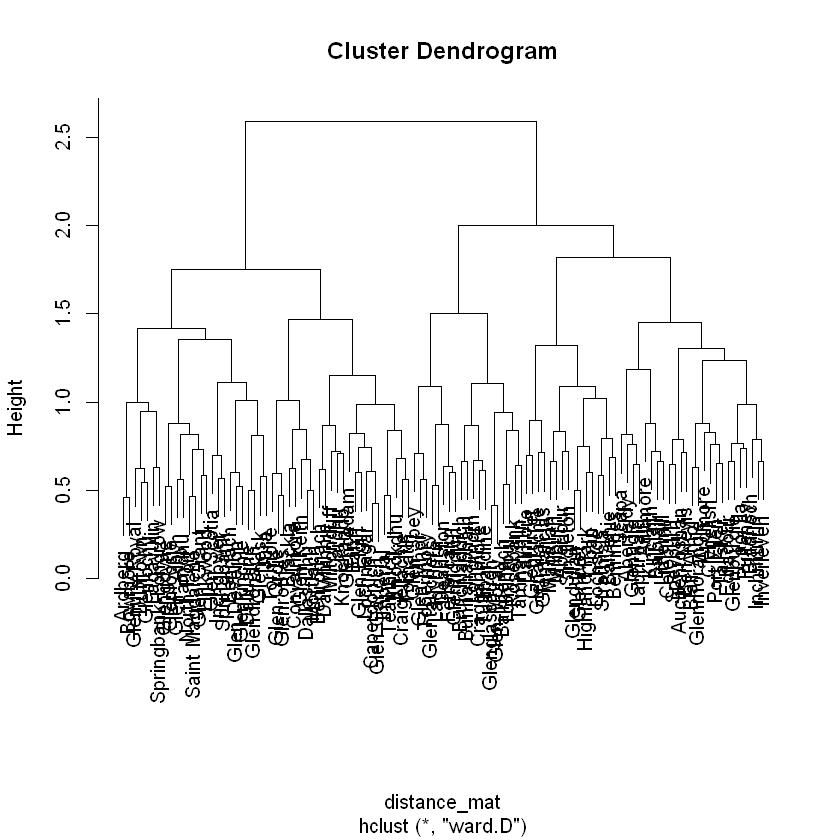

In [246]:
# Create distance matrix
distance_mat <- dist(scotch, method = 'binary') # The "binary" method is equivalent to the Jacard 
                                                # distance since I'm using binary data
set.seed(123)  # Setting seed for reproducability

hc_initial <- hclust(distance_mat, method = "ward.D") 
plot(hc_initial)
coef(hc_initial) # Calculate Agglomerative Coefficient 

### Optimization

The initial model I made has a pretty decent Agglomerative Coefficient of approximately 0.76, which measures how well-formed the clusters are. However, it would be irresponsible of me to stop there, so I am now going to use some functions from the "cluster" package to see if I can find a better model.

The first function I'm going to use is the diana(), [DIvisive ANAlysis Clustering](https://www.rdocumentation.org/packages/cluster/versions/2.1.4/topics/diana), function, which is a top-down clustering method unlike the hclust() function used for my initial model. I first will be feeding the function the distance matrix I created earlier. Then I will be feeding it the original dataset, and let the function itself calculate the distance using the two methods available. Finally, I will calculate the Divisive Coefficient of each model, which is analogous to the Agglomerative Coefficient.

In [247]:
# Load the "cluster" package
library("cluster")
hc_0 <- diana(distance_mat)
hc_0$dc
hc_1 <- diana(scotch, diss = FALSE, metric = 'euclidean') 
hc_1$dc 
hc_2 <- diana(scotch, diss = FALSE, metric = 'manhattan')
hc_2$dc 

[1] 0.354924

[1] 0.3819364

[1] 0.6018349

I will now be making some models using the agnes(), [Agglomerative Nesting](https://www.rdocumentation.org/packages/cluster/versions/2.1.4/topics/agnes), function. This, like hclust() is a bottom-up method. As with the diana() function, I am going to compare models created using my pre-calculated distance matrix with models where the function calculates it for me.

Similarly to hclust(), agnes() requires a linkage function, so I am going to define functions to calculate the Agglomerative Coefficient for various linkage functions in an efficient way.

In [256]:
# Load the "purrr" 
library("purrr")

linkage <- c( "average", "complete", "single", "ward")
names(linkage) <- c( "average", "complete", "single", "ward")

# Compute the Agglomerative Coefficient for each linkage function
agnes_coef_dist <- function(x) {
  agnes(distance_mat, method = x)$ac 
} 

# Doing this again with just the dataset
agnes_coef_scotch <- function(x) {
  agnes(scotch, diss = FALSE, method = x)$ac # diss = FALSE because "scotch" is the observations, 
                                             # not a distance matrix
} 

In [257]:
map(linkage, agnes_coef_dist)
map(linkage, agnes_coef_scotch)

$average
[1] 0.317158

$complete
[1] 0.3859144

$single
[1] 0.1868759

$ward
[1] 0.6552443

$average
[1] 0.2886594

$complete
[1] 0.4038778

$single
[1] 0.2136371

$ward
[1] 0.5905111

Comparing the coefficients of all of the models, we can see that yes, that original model was the best one. So we will now create some visualizations that will make the results of the clustering easier to interpret.

In [259]:
# Build final model
hc <- hclust(distance_mat, method = "ward.D")
coef(hc) # AC of 0.76

[1] 0.7626219

### Visualizations
Using the "dendextend" package, I'm going to create a dendrogram that hopefully will be more readable than the basic one from earlier.

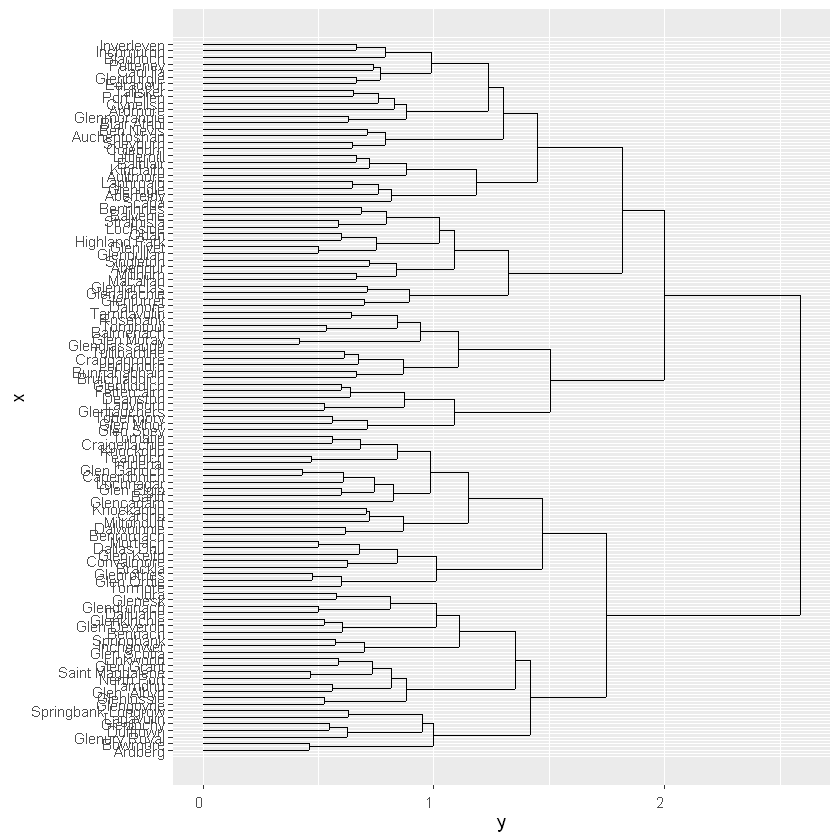

In [260]:
library("dendextend")
dend <- as.dendrogram(hc)
ggdendrogram(dend, rotate = TRUE,theme_dendro = FALSE)

This looks definitely looks better, but it is still not super readable as the distillery names are overlapping. Because of this, I am going to make a polar dendrogram to fan out the names.

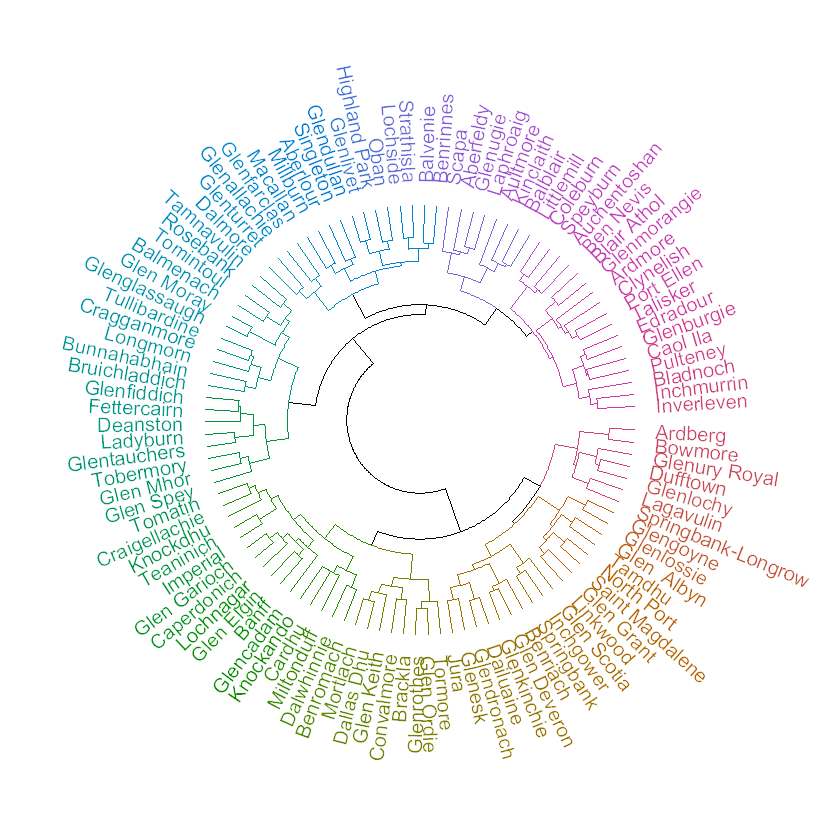

In [261]:
# Load "circlize" package to fan out the dendrogram
library("circlize")
dend <- dend %>% 
   color_branches(k=12) %>% # Same number of clusters as in the paper
   color_labels

par(mar = rep(0,4))
circlize_dendrogram(dend, labels_track_height = 0.4 , dend_track_height = 0.4) 

## Section 3: Discussion

When reading this dendrogram, I specifically looked at the clusters with scotches I know I have tasted. I noticed that three Islay scotches, Ardbeg (spelled "Ardberg" in this dataset), Bowmore, and Lagavulin were all in the same cluster, which makes a lot of sense to me as they I know they have similar flavor profiles. Meanwhile, another Islay scotch with a very different flavor profile, Laphroiag, was clustered exclusively with scotches from other regions. While this is by no means a thorough form of evaluation, these examples and the Agglomerative Coefficient I calculated earlier lead me to believe that this model does a pretty good job of doing what I set out to do. Based off of clusters that had contained the most amount of scotches I like, I am going to put Dufftown and Tullibardine on my list of scotches to try when I get the chance!

### Bonus Analysis 
Remember that copy I made of the data that still had the geographical information? Well, for sake of my own curiosity, I am going to make a model that's identical to my final model, but using this dataset instead to see how this might affect the clusters.

In [265]:
set.seed(123)
distance_mat_geo <- dist(scotch_with_geo, method = 'binary') # Make a new distance matrix
hc_geo <- hclust(distance_mat_geo, method = "ward.D") # Build the model


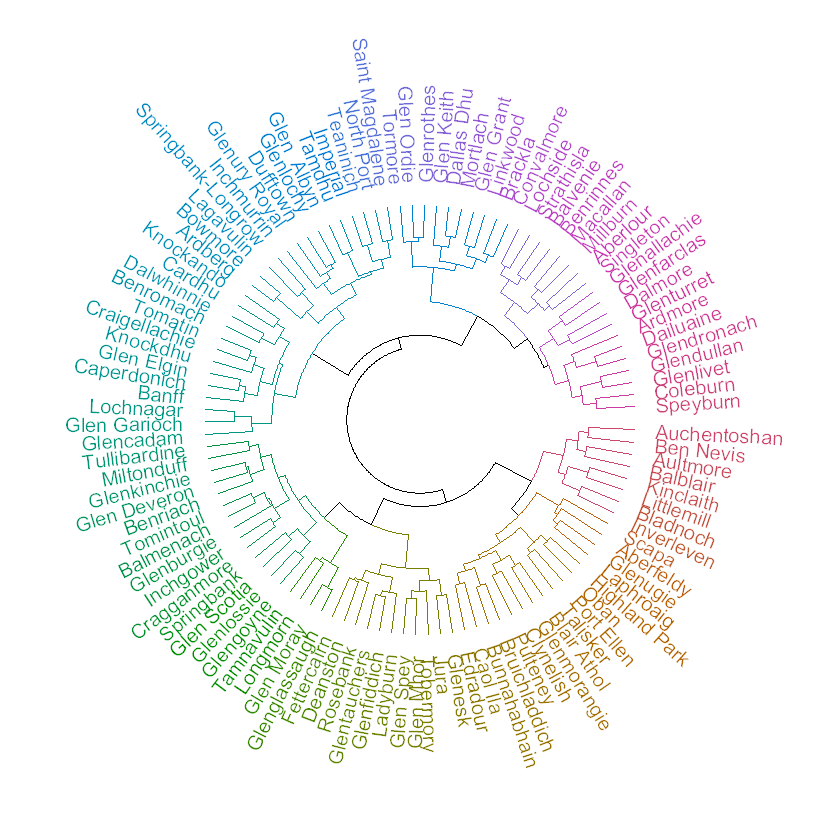

In [266]:
dend_geo <- as.dendrogram(hc_geo) # Make a dendrogram

dend_geo <- dend_geo %>% 
   color_branches(k=12) %>% # Cut off at 12 clusters
   color_labels

par(mar = rep(0,4))
circlize_dendrogram(dend_geo, labels_track_height = 0.4 , dend_track_height = 0.4) # Cirlize the plot

At first glance, it is quite difficult to tell the differences, but there was definitely some shuffling around. One thing I noticed is that this model put Bunnahabhain in the same cluster as Caol Ila. These distilleries are located [quite close](https://islay.com/about-islay/islay-distilleries/) to each other, but I distinctly remember having wildly different opinions about them. From this, I believe that using data without the geographical information will steer me in a better direction for the next step of my scotch tasting journey.